This notebook processes data. It loads WAV files and computes its corresponding spectrogram, and loads MIDI files.

Many hyperparameters are chosen based on: https://arxiv.org/pdf/1710.11153.pdf (Onsets and Frames)

In [27]:
# Load libraries

import librosa
import librosa.display
import matplotlib.pyplot as plt
import pretty_midi

In [54]:
# User parameters

wav_path = 'Menuett_G_dur_BWV.Anh.114.wav'
midi_path = 'Menuett_G_dur_BWV.Anh.114.mid'
sample_rate = 16000 # 22050 is default, 16000 is to match the paper
num_freq_bins = 229

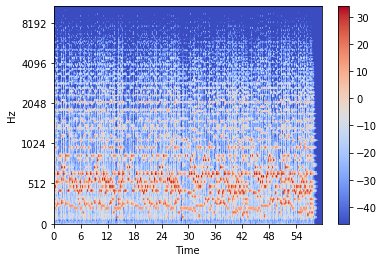

In [55]:
# Load in WAV file

audio, _ = librosa.core.load(wav_path, sr=sample_rate)
mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=num_freq_bins)
log_mel_spec = librosa.power_to_db(mel_spec) # compute the log of the amplitudes
librosa.display.specshow(log_mel_spec, x_axis='time', y_axis='mel')
plt.colorbar()

"Log_mel_spec" is the input data to the network (once it is clipped to the right duration, and further preprocessed if desired).

C:\Users\antho\Miniconda3\envs\py37\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  RuntimeWarning)


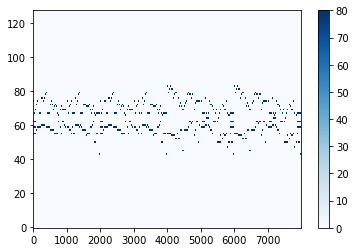

In [64]:
# Load in MIDI file

midi = pretty_midi.PrettyMIDI(midi_path)
audio_duration = librosa.get_duration(audio, sr=sample_rate)
piano_notes = midi.get_piano_roll(fs=100) # not sure what this should be at the moment and needs to be updated
plt.imshow(piano_notes, cmap="Blues", aspect="auto", origin=[128,0]) # auto makes each box rectangular, origin puts 128th row on top
plt.colorbar()
plt.show()

In [57]:
# The second dimension of these two arrays should match - to be updated later

print(log_mel_spec.shape)
print(piano_notes.shape)

(229, 2568)
(128, 2510)


Please ignore everything below this.

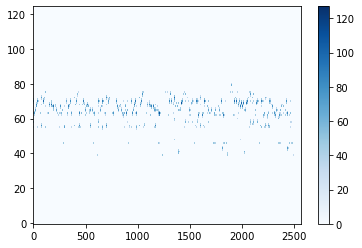

In [63]:
import numpy as np
from reverse_pianoroll import *
C = np.abs(librosa.cqt(audio, sr=sample_rate))
piano_roll = cqt_to_piano_roll(C, 21, 108, 32)
plt.imshow(piano_roll, cmap="Blues", aspect="auto", origin=[128,0]) # auto makes each box rectangular, origin puts 128th row on top
plt.colorbar()
plt.show()